**РЕГРЕССИЯ**

---



Ссылка на датасет - https://archive.ics.uci.edu/dataset/165/real+estate+valuation+data+set
*  Бетон является самым важным материалом в гражданском строительстве. Прочность бетона на сжатие сильно зависит от возраста и состава. (Прочность бетона на сжатие)

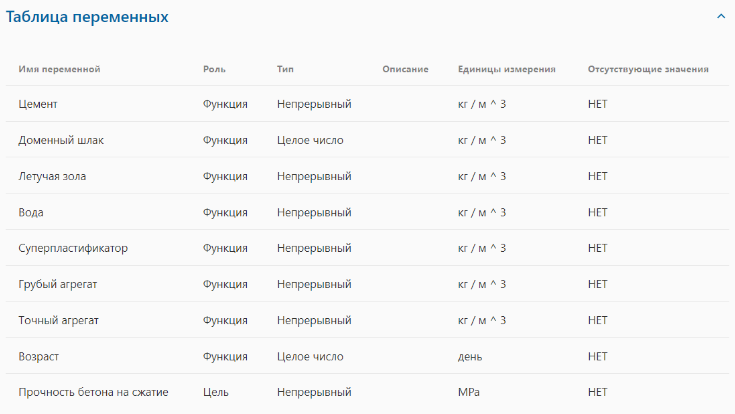

In [82]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

**Загрузка данных**

In [83]:
!pip install ucimlrepo

In [84]:
from ucimlrepo import fetch_ucirepo

In [93]:
data = fetch_ucirepo(id=165)
# Извлекаем признаки и целевые переменные
X = data.data.features
y = data.data.targets
y.columns = ['target']
# Объединяем X и y
df = pd.concat([X, y], axis=1)

**Анализ данных**

In [94]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   target              1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [96]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,target
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [97]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'target'],
      dtype='object')

In [98]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
target,0


In [99]:
# Для вывода метрик
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

Матрица корреляции

<Axes: >

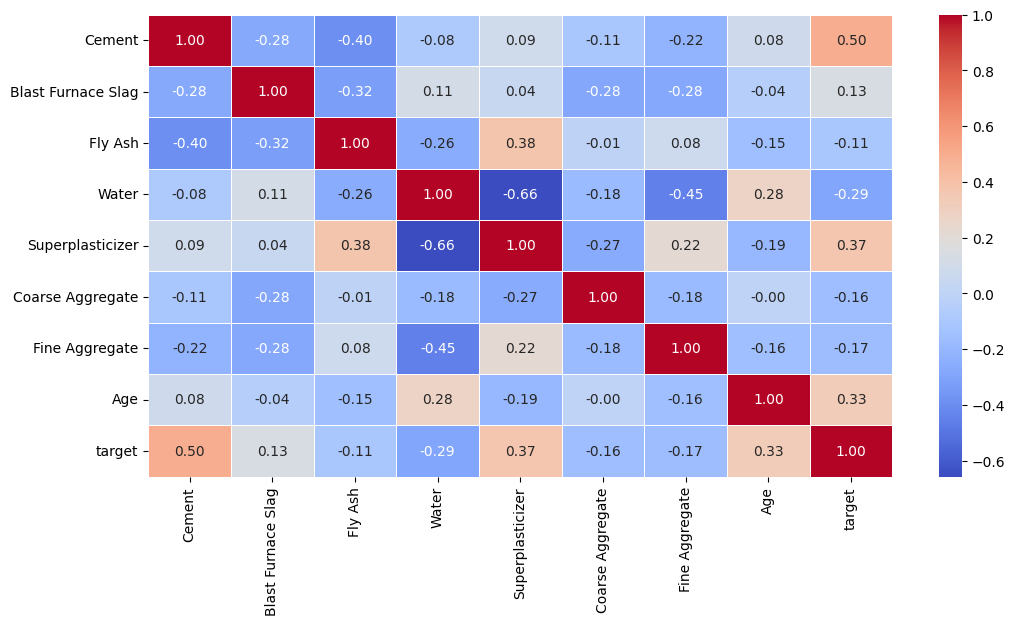

In [100]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Вывод: основные факторы, влияющие на целевой показатель, —  Cement (0.5), Water (-0.29), Superplasticizer (0.37) и Age (0.33)

# **Линейная регрессия**

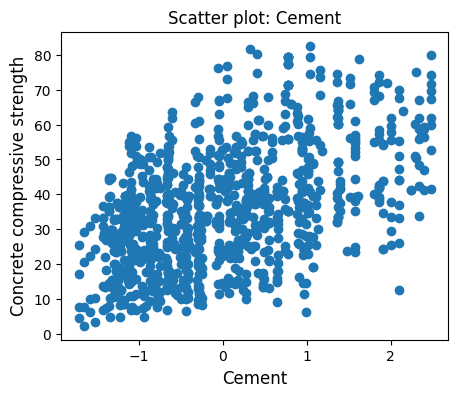

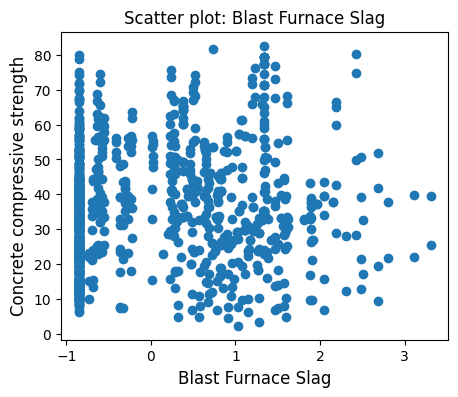

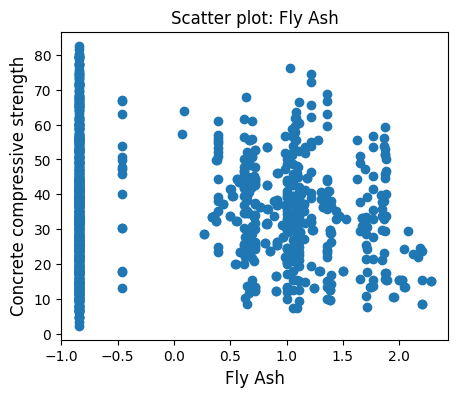

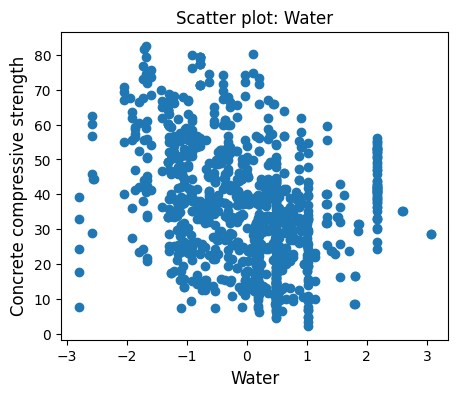

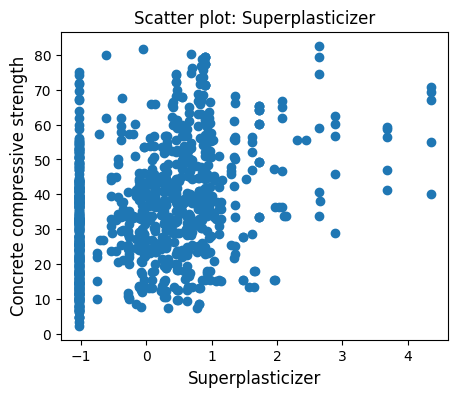

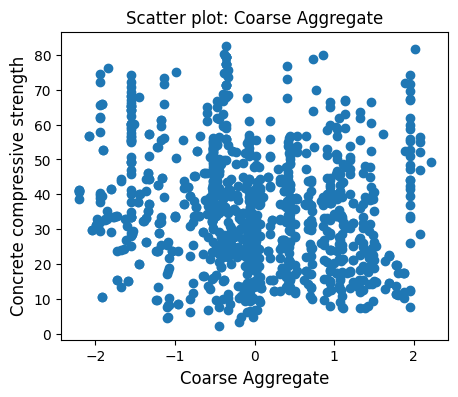

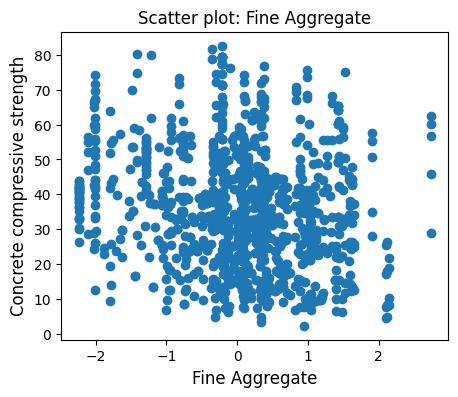

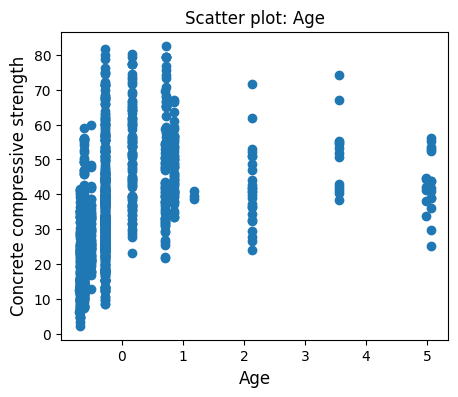

In [121]:
# Проходимся по каждому признаку, строим графики рассеяния
for feature_name in X.columns:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[feature_name], y)
    plt.ylabel('Concrete compressive strength', size=12)
    plt.xlabel(feature_name, size=12)
    plt.title(f'Scatter plot: {feature_name}')
    plt.show()

Нормализация данных

In [102]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
# Преобразуем обратно в DataFrame, чтобы сохранить имена столбцов
X = pd.DataFrame(X_scaled, columns=X.columns)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [104]:
# Create a linear regression model
modelLR = LinearRegression()
# Fit the model to the data
modelLR.fit(X_train, y_train)
# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [105]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  10.6848
  R2: 0.557
 Adjusted R2: 0.539
 Cross Validated R2: 0.6069


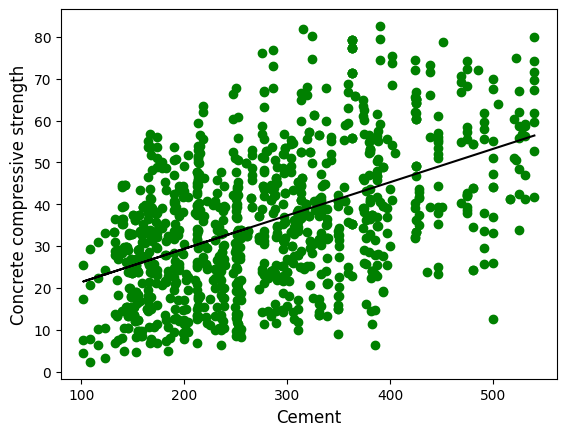

In [123]:
# попробуем отрисовать, как выглядит наша линейная регрессия
X2 = df['Cement'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['target'].values
model2 = LinearRegression()
model2.fit(X2, y2)
plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Concrete compressive strength', size=12)
plt.xlabel('Cement', size=12)
plt.show()

Вывод:

# **Полиномиальная регрессия**

In [107]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [108]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  6.0929
  R2: 0.8628
 Adjusted R2: 0.7065
 Cross Validated R2: 0.7739


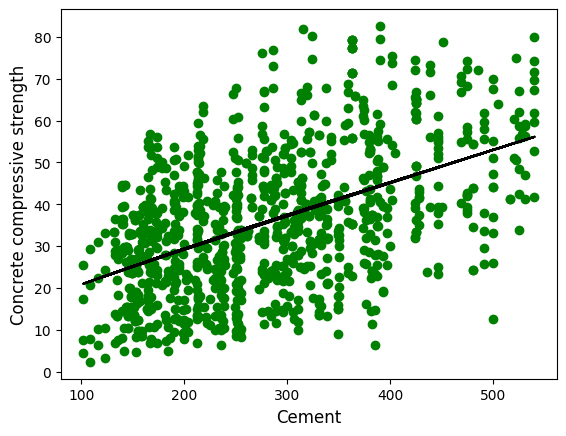

In [122]:
X2 = df['Cement'].values[:,np.newaxis]
y2 = df['target'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Concrete compressive strength', size=12)
plt.xlabel('Cement', size=12)
plt.show()

# **Регрессия дерева принятия решений**

In [110]:
# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [111]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  6.1008
  R2: 0.8556
 Adjusted R2: 0.8497
 Cross Validated R2: 0.8167


# **Регрессия случайного леса**

In [112]:
# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  4.214
  R2: 0.9311
 Adjusted R2: 0.9283
 Cross Validated R2: 0.8943


# **Регрессия опорных векторов (SVR)**

In [113]:
# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  11.5273
  R2: 0.4844
 Adjusted R2: 0.4635
 Cross Validated R2: 0.5743


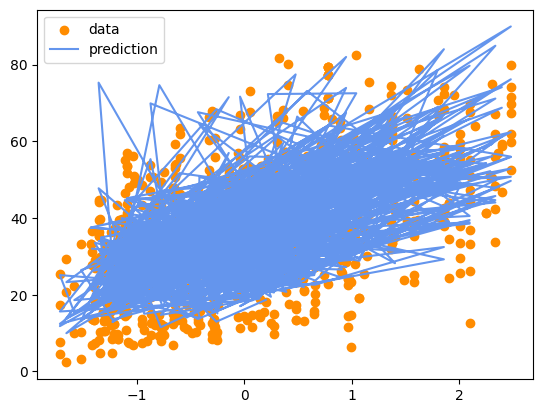

In [114]:
plt.scatter(X_train["Cement"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Cement"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [115]:
# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train, y_train)
# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  11.1622
  R2: 0.5165
 Adjusted R2: 0.4969
 Cross Validated R2: 0.4849


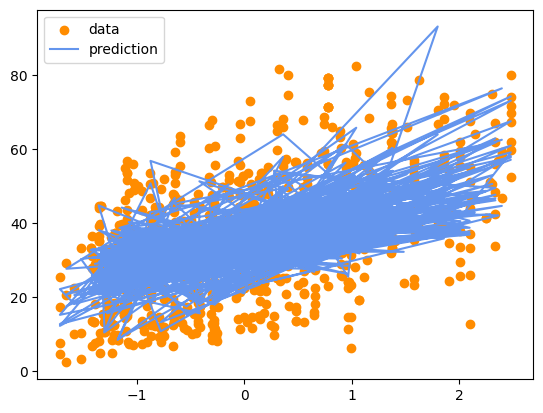

In [116]:
plt.scatter(X_train["Cement"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Cement"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [117]:
# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train, y_train)
# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  9.0894
  R2: 0.6794
 Adjusted R2: 0.6664
 Cross Validated R2: 0.6171


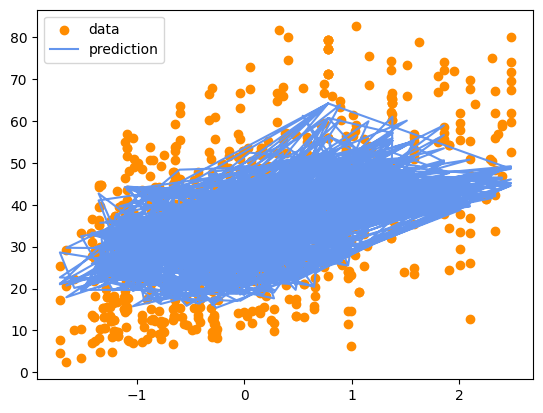

In [118]:
plt.scatter(X_train["Cement"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Cement"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# **Регрессия ElasticNet**

In [119]:
# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  10.6478
  R2: 0.5601
 Adjusted R2: 0.5422
 Cross Validated R2: 0.6038


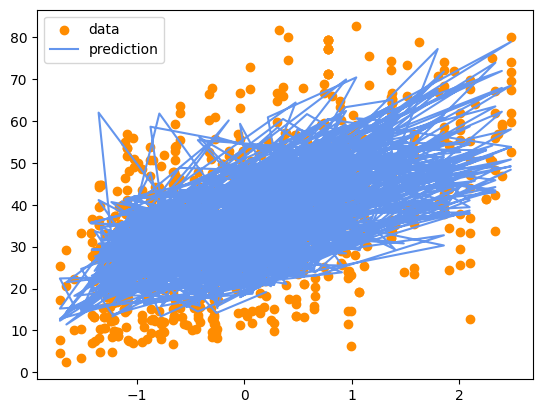

In [120]:
plt.scatter(X_train["Cement"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Cement"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Выводы
* Линейная регрессия R2 - 0.557
* Полиномиальная регрессия R2 - 0.8628
* Регрессия дерева принятия решений R2 - 0.8556
* Регрессия случайного леса R2 - 0.9311
* Регрессия опорных векторов R2 - 0.4844
* Регрессия ElasticNet R2 - 0.5601

Регрессия случайного леса показала наилучший коэффициент детерминации (R2) среди всех моделей